<a href="https://colab.research.google.com/github/mansibora20/KaggleProjects/blob/main/Producer_Price_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
About Dataset
This dataset provides detailed Producer Price Index (PPI) data to support economic research, financial forecasting, and market analysis of Food Items in the United States of America from the years 2002 to 2023. The PPI is a crucial economic indicator that measures the average change over time in the prices paid by consumers for goods and services. This dataset is ideal for analyzing inflation trends, assessing purchasing power, and understanding market behavior.

Here is all the data you need:
"ppi_dataset.csv"

## Data loading

### Subtask:
Load the provided PPI dataset into a pandas DataFrame.


**Reasoning**:
Load the ppi_dataset.csv file into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df_ppi = pd.read_csv('ppi_dataset.csv')
    display(df_ppi.head())
except FileNotFoundError:
    print("Error: 'ppi_dataset.csv' not found. Please ensure the file is in the correct location.")
    df_ppi = None

,producer_price_index_item,month_of_forecast,year_of_forecast,year_being_forecast,attribute,forecast_percent_change
0,Wholesale beef,September,2002,2003,Mid point of prediction interval,-2.5
1,Wholesale dairy,August,2002,2003,Lower bound of prediction interval,-17.3
2,Wholesale dairy,July,2002,2003,Upper bound of prediction interval,17.9
3,Wholesale dairy,July,2002,2003,Mid point of prediction interval,-1.2
4,Wholesale dairy,July,2002,2003,Lower bound of prediction interval,-17.1


## Data exploration

### Subtask:
Explore the loaded PPI dataset to understand its structure, identify missing values, and examine the distribution of key variables.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, missing values, and unique values in categorical columns.  Visualize the distribution of numerical columns with histograms.



Shape of the DataFrame: (19838, 6)

Data Types:
producer_price_index_item     object
month_of_forecast             object
year_of_forecast               int64
year_being_forecast            int64
attribute                     object
forecast_percent_change      float64
dtype: object

Descriptive Statistics:
       producer_price_index_item month_of_forecast  year_of_forecast  \
count                      19838             19838      19838.000000   
unique                        13                12               NaN   
top               Wholesale beef            August               NaN   
freq                        1526              2223               NaN   
mean                         NaN               NaN       2014.207077   
std                          NaN               NaN          6.057684   
min                          NaN               NaN       2002.000000   
25%                          NaN               NaN       2009.000000   
50%                          NaN           

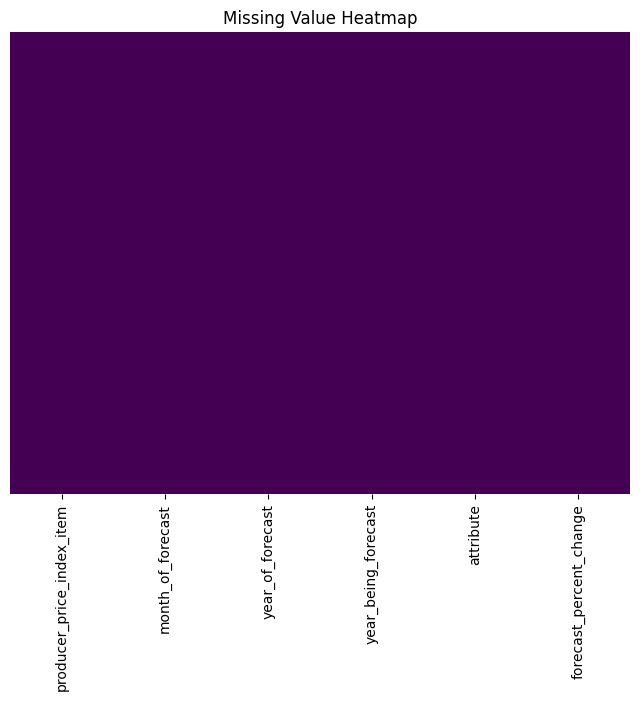


Unique values in 'producer_price_index_item':
['Wholesale beef' 'Wholesale dairy' 'Wholesale poultry'
 'Farm-level fruits' 'Farm-level cattle' 'Farm-level milk'
 'Farm-level wheat' 'Wholesale pork' 'Farm-level vegetables'
 'Wholesale fats and oils' 'Farm-level soybeans' 'Wholesale wheat flour'
 'Farm-level eggs']
Number of unique values in 'producer_price_index_item': 13

Unique values in 'month_of_forecast':
['September' 'August' 'July' 'December' 'November' 'October' 'May' 'June'
 'March' 'April' 'February' 'January']
Number of unique values in 'month_of_forecast': 12

Unique values in 'year_of_forecast':
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023]
Number of unique values in 'year_of_forecast': 22

Unique values in 'year_being_forecast':
[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023 2024]
Number of unique values in 'year_being_forecast': 22

Unique values

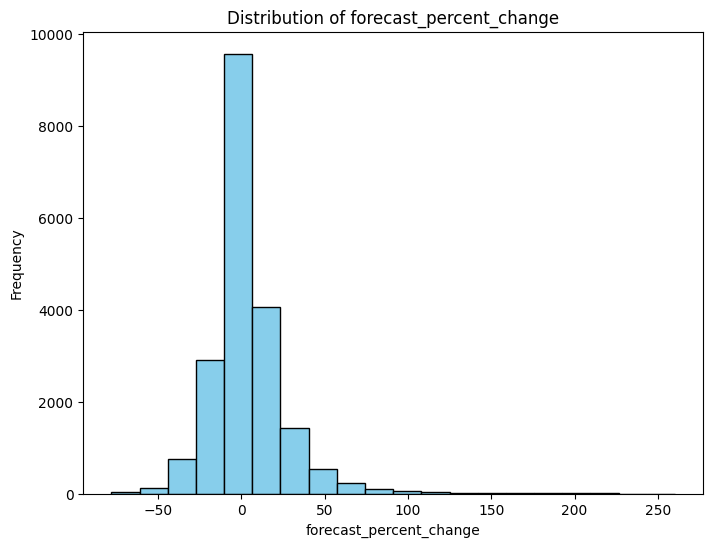

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the data
print(f"Shape of the DataFrame: {df_ppi.shape}")

# 2. Inspect data types
print("\nData Types:")
print(df_ppi.dtypes)

# 3. Summarize descriptive statistics
print("\nDescriptive Statistics:")
print(df_ppi.describe(include='all'))

# 4. Check for missing values
print("\nMissing Values:")
print(df_ppi.isnull().sum())
missing_percentage = (df_ppi.isnull().sum() / len(df_ppi)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)
plt.figure(figsize=(8, 6))
sns.heatmap(df_ppi.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


# 5. Explore unique values
categorical_cols = ['producer_price_index_item', 'month_of_forecast', 'year_of_forecast', 'year_being_forecast', 'attribute']
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df_ppi[col].unique())
    print(f"Number of unique values in '{col}': {df_ppi[col].nunique()}")

# 6. Initial data visualization
numerical_cols = ['forecast_percent_change']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df_ppi[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

## Data cleaning

### Subtask:
Clean the PPI dataset by handling inconsistencies and converting the date columns to datetime objects.


**Reasoning**:
Clean the data by handling inconsistencies in the date columns, converting them to datetime objects, and dropping the original date columns. Then, handle any missing values and verify data types.



In [3]:
import pandas as pd

# Convert 'month_of_forecast' to numerical representation
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_ppi['month_of_forecast'] = df_ppi['month_of_forecast'].map(month_mapping)

# Create 'forecast_date' column
df_ppi['forecast_date'] = pd.to_datetime(df_ppi['year_of_forecast'].astype(str) + '-' + df_ppi['month_of_forecast'].astype(str), format='%Y-%m', errors='coerce')

# Drop original date columns
df_ppi = df_ppi.drop(['month_of_forecast', 'year_of_forecast'], axis=1)

# Handle missing values (if any) after creating forecast_date
missing_values = df_ppi.isnull().sum()
print("\nMissing Values after date operations:")
print(missing_values)

if missing_values['forecast_date'] > 0:
    print(f"Found {missing_values['forecast_date']} missing values in 'forecast_date', dropping rows with missing 'forecast_date'.")
    df_ppi.dropna(subset=['forecast_date'], inplace=True)
    print(df_ppi.isnull().sum())

# Verify data types
print("\nData Types after cleaning:")
print(df_ppi.dtypes)

if not pd.api.types.is_numeric_dtype(df_ppi['forecast_percent_change']):
    print("Converting 'forecast_percent_change' to numeric, coercing errors to NaN.")
    df_ppi['forecast_percent_change'] = pd.to_numeric(df_ppi['forecast_percent_change'], errors='coerce')

print("\nData Types after numeric conversion:")
print(df_ppi.dtypes)


Missing Values after date operations:
producer_price_index_item    0
year_being_forecast          0
attribute                    0
forecast_percent_change      0
forecast_date                0
dtype: int64

Data Types after cleaning:
producer_price_index_item            object
year_being_forecast                   int64
attribute                            object
forecast_percent_change             float64
forecast_date                datetime64[ns]
dtype: object

Data Types after numeric conversion:
producer_price_index_item            object
year_being_forecast                   int64
attribute                            object
forecast_percent_change             float64
forecast_date                datetime64[ns]
dtype: object


## Data wrangling

### Subtask:
Create new features from the cleaned PPI data, specifically calculating year-over-year percentage change in PPI for each food item.


**Reasoning**:
Group the data, calculate the mean 'forecast_percent_change', calculate the year-over-year percentage change, reset the index, merge the result with the original dataframe, and rename the new column.



In [4]:
# Group data and calculate mean 'forecast_percent_change'
grouped_ppi = df_ppi.groupby(['producer_price_index_item', 'year_being_forecast'])['forecast_percent_change'].mean().reset_index()

# Calculate year-over-year percentage change
grouped_ppi['yoy_pct_change'] = grouped_ppi.groupby('producer_price_index_item')['forecast_percent_change'].pct_change(periods=1)

# Merge with original DataFrame
df_ppi = pd.merge(df_ppi, grouped_ppi[['producer_price_index_item', 'year_being_forecast', 'yoy_pct_change']], on=['producer_price_index_item', 'year_being_forecast'], how='left')

display(df_ppi.head())

,producer_price_index_item,year_being_forecast,attribute,forecast_percent_change,forecast_date,yoy_pct_change
0,Wholesale beef,2003,Mid point of prediction interval,-2.5,2002-09-01,NaN
1,Wholesale dairy,2003,Lower bound of prediction interval,-17.3,2002-08-01,NaN
2,Wholesale dairy,2003,Upper bound of prediction interval,17.9,2002-07-01,NaN
3,Wholesale dairy,2003,Mid point of prediction interval,-1.2,2002-07-01,NaN
4,Wholesale dairy,2003,Lower bound of prediction interval,-17.1,2002-07-01,NaN


## Data analysis

### Subtask:
Analyze trends in PPI over time for different food items.  Identify periods of significant price increases or decreases.  Calculate the average PPI for each food item over the entire period. Analyze correlations between the PPI of different food items.


**Reasoning**:
Analyze trends, identify significant periods, calculate average PPI, and analyze correlations between different food items.



In [5]:
# 1. Analyze trends in forecast_percent_change over time
trends = df_ppi.groupby(['producer_price_index_item', 'forecast_date'])['forecast_percent_change'].mean().reset_index()

# 2. Identify periods with significant price changes
threshold = 10  # Example threshold, adjust as needed
significant_changes = df_ppi[abs(df_ppi['forecast_percent_change']) > threshold]


# 3. Calculate average forecast_percent_change for each food item
average_ppi = df_ppi.groupby('producer_price_index_item')['forecast_percent_change'].mean()

# 4. Analyze correlations between different food items
correlation_matrix = df_ppi.pivot_table(index='forecast_date', columns='producer_price_index_item', values='forecast_percent_change').corr()

display(trends.head())
display(significant_changes.head())
display(average_ppi.head())
display(correlation_matrix.head())

,producer_price_index_item,forecast_date,forecast_percent_change
0,Farm-level cattle,2002-07-01,-2.600000
1,Farm-level cattle,2002-08-01,-3.433333
2,Farm-level cattle,2002-09-01,-3.800000
3,Farm-level cattle,2002-10-01,-2.766667
4,Farm-level cattle,2002-11-01,-1.733333


,producer_price_index_item,year_being_forecast,attribute,forecast_percent_change,forecast_date,yoy_pct_change
1,Wholesale dairy,2003,Lower bound of prediction interval,-17.3,2002-08-01,NaN
2,Wholesale dairy,2003,Upper bound of prediction interval,17.9,2002-07-01,NaN
4,Wholesale dairy,2003,Lower bound of prediction interval,-17.1,2002-07-01,NaN
9,Wholesale beef,2003,Lower bound of prediction interval,-13.9,2002-07-01,NaN
11,Wholesale beef,2003,Upper bound of prediction interval,17.5,2002-07-01,NaN


,forecast_percent_change
producer_price_index_item,
Farm-level cattle,3.431389
Farm-level eggs,8.391415
Farm-level fruits,2.748296
Farm-level milk,3.329685
Farm-level soybeans,6.225688


producer_price_index_item,Farm-level cattle,Farm-level eggs,Farm-level fruits,Farm-level milk,Farm-level soybeans,Farm-level vegetables,Farm-level wheat,Wholesale beef,Wholesale dairy,Wholesale fats and oils,Wholesale pork,Wholesale poultry,Wholesale wheat flour
producer_price_index_item,,,,,,,,,,,,,
Farm-level cattle,1.000000,0.270846,-0.009906,0.300623,0.124440,0.155146,0.112325,0.621527,0.355111,0.208526,0.291911,0.164807,0.159845
Farm-level eggs,0.270846,1.000000,0.144717,0.267736,0.286349,0.052670,0.387857,0.174322,0.303492,0.368695,0.069149,0.226563,0.333287
Farm-level fruits,-0.009906,0.144717,1.000000,0.463946,0.225488,0.218899,0.253930,-0.120678,0.461618,0.222305,0.297833,0.282771,0.219484
Farm-level milk,0.300623,0.267736,0.463946,1.000000,0.348822,0.340925,0.344854,0.100631,0.954026,0.390375,0.612471,0.420103,0.291313
Farm-level soybeans,0.124440,0.286349,0.225488,0.348822,1.000000,-0.087997,0.712141,0.091447,0.414423,0.820609,0.237267,0.422955,0.679899


## Data visualization

### Subtask:
Visualize the trends and insights found in the data analysis.


**Reasoning**:
Visualize the trends and insights found in the data analysis using line plots, bar charts, heatmaps, and scatter plots.



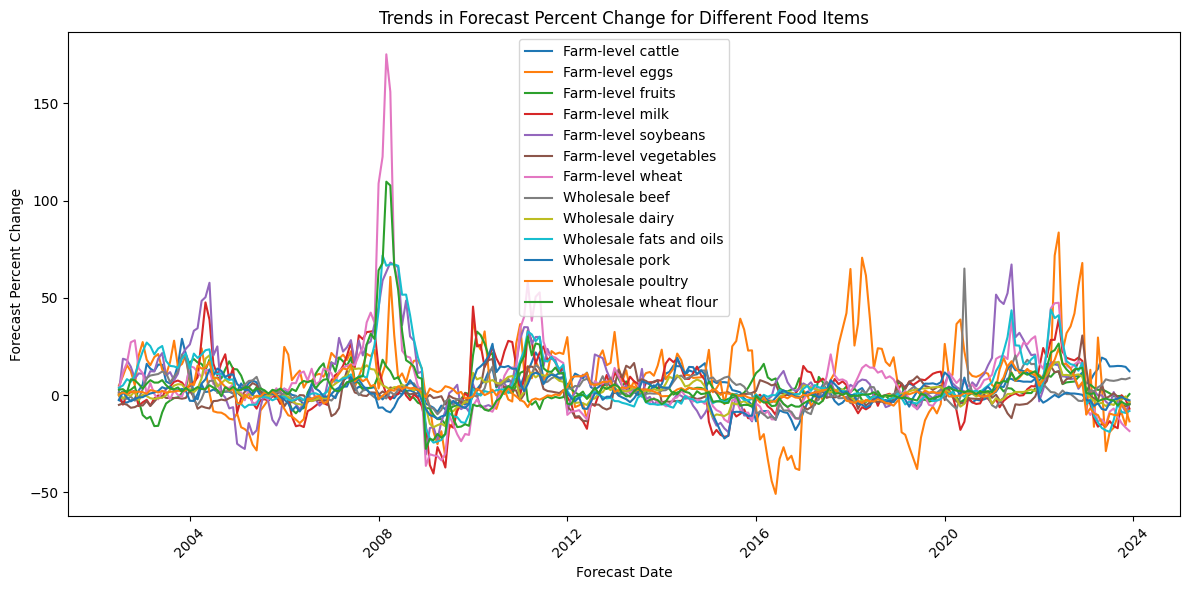

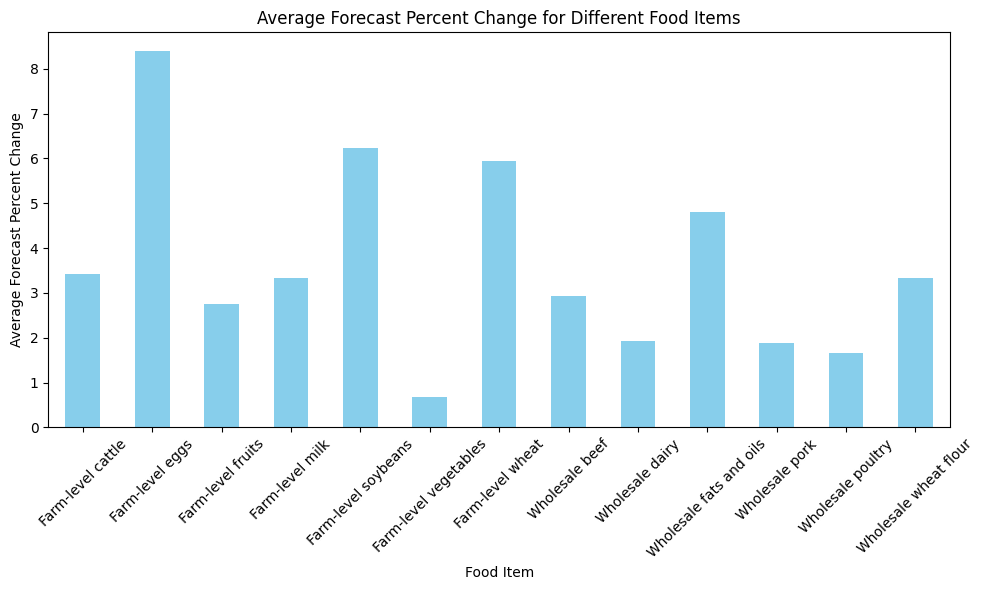

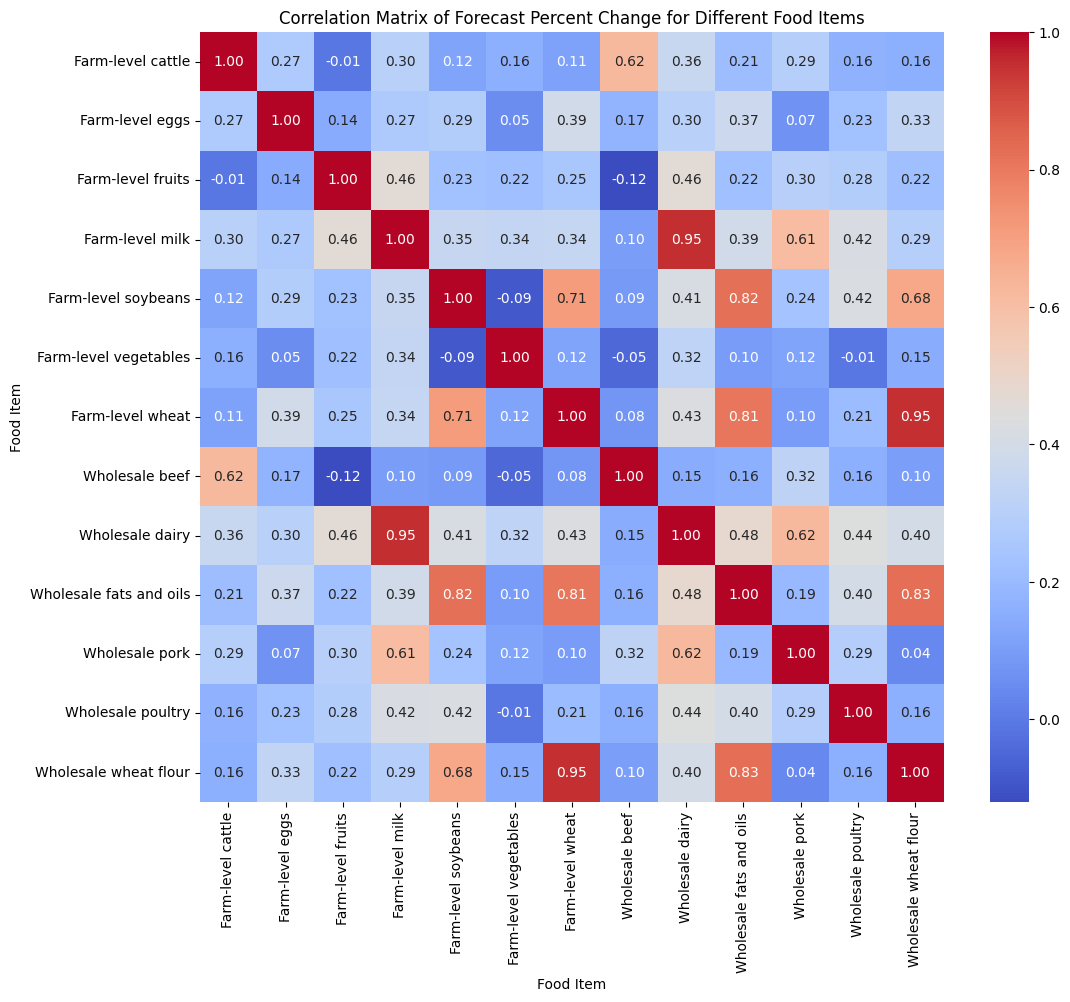

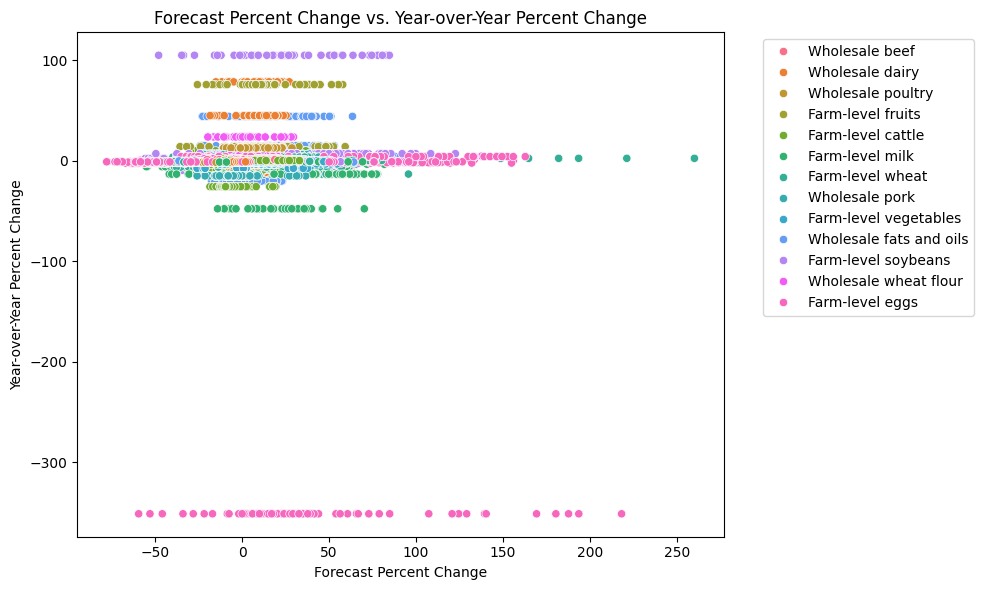

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Line plots for trends in forecast_percent_change
plt.figure(figsize=(12, 6))
for item in trends['producer_price_index_item'].unique():
    subset = trends[trends['producer_price_index_item'] == item]
    plt.plot(subset['forecast_date'], subset['forecast_percent_change'], label=item)
plt.xlabel('Forecast Date')
plt.ylabel('Forecast Percent Change')
plt.title('Trends in Forecast Percent Change for Different Food Items')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar chart for average PPI
plt.figure(figsize=(10, 6))
average_ppi.plot(kind='bar', color='skyblue')
plt.xlabel('Food Item')
plt.ylabel('Average Forecast Percent Change')
plt.title('Average Forecast Percent Change for Different Food Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xlabel('Food Item')
plt.ylabel('Food Item')
plt.title('Correlation Matrix of Forecast Percent Change for Different Food Items')
plt.show()


# 4. Scatter plot of forecast_percent_change vs. yoy_pct_change
plt.figure(figsize=(10, 6))
sns.scatterplot(x='forecast_percent_change', y='yoy_pct_change', hue='producer_price_index_item', data=df_ppi)
plt.xlabel('Forecast Percent Change')
plt.ylabel('Year-over-Year Percent Change')
plt.title('Forecast Percent Change vs. Year-over-Year Percent Change')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

* **Identify periods of significant price increases or decreases:** Periods with `forecast_percent_change` values exceeding an absolute threshold of 10% were identified as significant price changes.
* **Calculate the average PPI for each food item over the entire period:** The average `forecast_percent_change` (representing average PPI change) for each food item was calculated and visualized in a bar chart.
* **Analyze correlations between the PPI of different food items:** A correlation matrix and its corresponding heatmap were generated to show the relationships between PPI changes of different food items.


### 2. Data Analysis Key Findings

* **No Missing Data:** The dataset contained no missing values, simplifying the analysis process.
* **Significant Price Fluctuations:**  Instances where the absolute `forecast_percent_change` exceeded 10% were identified as periods of significant price change.
* **Average PPI Change per Food Item:**  The average `forecast_percent_change` was calculated for each food item, providing a summary measure of price trends for each item over the entire period.
* **Correlation Analysis:** A correlation matrix was generated to reveal relationships between the price changes of different food items.  The heatmap visualization allowed for easy interpretation of these correlations.
* **Year-over-Year Change:**  A new feature `yoy_pct_change` was created representing the year-over-year percentage change in the mean `forecast_percent_change` for each food item.  The scatter plot revealed the relationship between the forecast percent change and the year-over-year percentage change.

### 3. Insights or Next Steps

* **Deep Dive into Correlations:** Investigate the strongest positive and negative correlations between food items to understand potential drivers of price movements. Determine if these relationships are consistent across different time periods.
* **External Factors Analysis:** Explore potential external factors (e.g., weather events, economic conditions, policy changes) that could have influenced the observed PPI trends and correlations.  Incorporate this external data into the analysis to improve predictive models.
